In [1]:
#Library import
import numpy as np
import pandas as pd
import kaggle.cli
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

from sklearn import preprocessing
from pathlib import Path
from zipfile import ZipFile
from IPython.display import display, HTML

In [2]:
#Source: https://www.kaggle.com/code/hieunt01/used-car-price-predictions-using-linear-regression
class GDLinearRegression:
    def __init__(self, learning_rate=0.1, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
    
    def set_learning_rate(self, new_learning_rate):
        self.learning_rate = new_learning_rate
    
    def _initialize_params_n_gradients(self, num_params):
        self.theta = np.zeros((num_params,))
        self.gradients = np.zeros((num_params,))
    
    def _get_cost(self):
        y_hat = np.dot(self.X, self.theta)
        cost = 1/2 * np.mean((y_hat-self.y)**2)
        return cost
    
    def _backpropagation(self):
        y_hat = np.dot(self.X, self.theta)
        for i in range(len(self.gradients)):
            self.gradients[i] = np.mean((y_hat - self.y) * self.X[:, i])
    
    def _update_params(self):
        self.theta -= self.learning_rate * self.gradients
    
    def fit(self, X, y):
        # Initialize X, y
        num_data_points = X.shape[0]
        num_features = X.shape[1]
        self.X = np.c_[np.ones((num_data_points, 1)), X]
        self.y = y
        num_params = num_features + 1
        prev_cost = 0
        iteration = 1
        # Initialize parameters theta, and gradients
        self._initialize_params_n_gradients(num_params)
        while True:
            # Compute cost
            cost = self._get_cost()
            # Calculate gradients
            self._backpropagation()
            # Update parameters
            self._update_params()
            # Loop until cost difference below epsilon value
            if np.abs(cost - prev_cost) < self.epsilon:
                break
            prev_cost = cost
            iteration += 1
        # Return the model
        return self
    
    def predict(self, X):
        num_data_points = X.shape[0]
        X_b = np.c_[np.ones((num_data_points, 1)), X]

        return np.dot(X_b, self.theta)

In [3]:
master = pd.read_csv('/Users/gabrielsuarez/Desktop/MACHINE_LEARNING/ML_2/input/master.csv') # file name
if 'Unnamed: 0' in master.columns:
    master = master.drop(['Unnamed: 0'], axis=1)
print(master.shape)
print(master.count())



/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6,7,8,10,12,13,14,15,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(935702, 20)
region          203207
price           935702
year            935702
make            935702
model           935702
condition       203207
cylinders       144576
fuel            203205
mileage         935702
transmission    203198
vin             858309
drive           153986
size             74976
type            178834
paint_color     162285
state           935702
city            730358
title_status      2137
color             2137
country           2137
dtype: int64


In [4]:
basicFeatures = ['year','mileage']
scaler = StandardScaler()

scaler.fit(master[basicFeatures])
lm = linear_model.LinearRegression()
lm = lm.fit(master[basicFeatures], master.price)

print ("R^2 score for simple linear regression: ", lm.score(master[basicFeatures], master.price))
pred = lm.predict(master[basicFeatures])
rmse = np.sqrt(mean_squared_error(master.price, pred))
print('RMSE for simple linear regression:' , rmse)


R^2 score for simple linear regression:  0.25949762153810185
RMSE for simple linear regression: 7847.192262383144


In [5]:
catgFeatures = ['state', 'make', 'model']

#Categorical variable encoding
for feature in catgFeatures:
    featureData = master[feature]
    featuresEncoded = LabelEncoder().fit_transform(featureData)
    master[feature] = featuresEncoded




In [6]:
master[['state','make','model','mileage','year']].head(10)

,state,make,model,mileage,year
0,52,20,13308,57923.0,2014.0
1,52,20,13308,57923.0,2014.0
2,52,20,13308,57923.0,2014.0
3,52,20,13308,57923.0,2014.0
4,52,20,13308,57923.0,2014.0
5,52,20,13308,57923.0,2014.0
6,52,10,13470,71229.0,2010.0
7,52,10,13470,71229.0,2010.0
8,52,10,13483,19160.0,2020.0
9,52,10,13483,19160.0,2020.0


In [7]:
master[['state','make','model','mileage','year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935702 entries, 0 to 935701
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   state    935702 non-null  int64  
 1   make     935702 non-null  int64  
 2   model    935702 non-null  int64  
 3   mileage  935702 non-null  float64
 4   year     935702 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 35.7 MB


<AxesSubplot:>

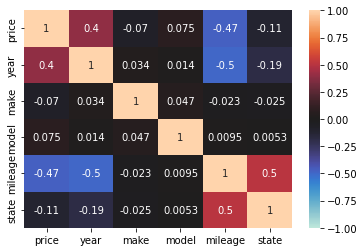

In [8]:
#heatmap for features
featureCorrelation = master.corr()
sns.heatmap(featureCorrelation, annot=True, vmin=-1, vmax=1, center=0)

<AxesSubplot:xlabel='state', ylabel='price'>

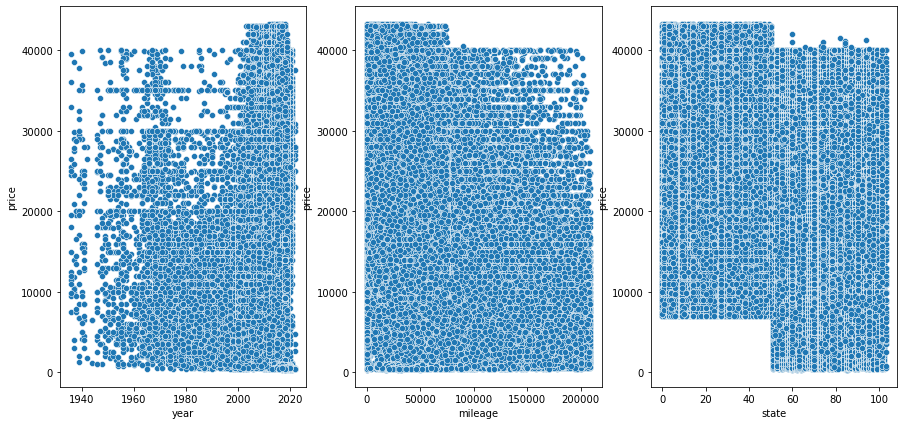

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
sns.scatterplot(x='year', y='price', data=master, ax=axes[0])
sns.scatterplot(x='mileage', y='price', data=master, ax=axes[1])
sns.scatterplot(x='state', y='price', data=master, ax=axes[2])

In [10]:
X = master[['year', 'mileage','state']].values
y = master['price'].values

In [11]:
from sklearn.model_selection import KFold # import k-fold validation
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 10 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 10-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))

print(rmse, '\n Average RMSE:', np.mean(rmse))
print(r2, '\n Average R2:', np.mean(r2))

KFold(n_splits=10, random_state=None, shuffle=True)
[7763.297344688981, 7734.6268673017075, 7762.304786401729, 7780.987118032375, 7740.000212588385, 7756.865848738887, 7760.7250957622855, 7756.20299116409, 7748.896170946721, 7772.261904115802] 
 Average RMSE: 7757.616833974096
[0.273974118468145, 0.2769177041635652, 0.2799495134130652, 0.2749846399646755, 0.27861588699236706, 0.2796359874137043, 0.27405813164809334, 0.27406155299054435, 0.27521412028477465, 0.27549012726780575] 
 Average R2: 0.27629017826067404


In [21]:
#linear regression (gradient descent)
normalizer = StandardScaler().fit(X_train)

gd_lr = Pipeline([('scaler', normalizer),
                  ('GDLR', GDLinearRegression())])
gd_lr.fit(X_train, y_train)

y_pred_gd = gd_lr.predict(X_test)
r2 = r2_score(y_test,y_pred_gd)
print("RMSE for testing set: : %.3f" % mean_squared_error(y_test, y_pred_gd, squared=False))
print('R^2 score for testing set: ', r2)

RMSE for testing set: : 7772.262
R^2 score for testing set:  0.27549012772395876


In [14]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

y_pred_poly = linear_model.LinearRegression()
y_pred_poly.fit(X_test_scaled,y_test)

y_pred_poly = y_pred_poly.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2 = r2_score(y_test,y_pred_poly)
print('RMSE for testing set: ', rmse)
print('R^2 score for testing set: ', r2)

RMSE for testing set:  7772.179600547971
R^2 score for testing set:  0.2755054714320835


In [15]:
# Random Forest regression
rfr = Pipeline([('scaler', normalizer),
                ('Random Forest', RandomForestRegressor(random_state=20))])
rfr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor(random_state=20))])

In [16]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor(random_state=20))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor(random_state=20))])

In [17]:
# Random Forest
y_pred_rf = rfr.predict(X_test)
r2 = r2_score(y_test,y_pred_rf)
print('RMSE for testing set: ', mean_squared_error(y_test, y_pred_rf, squared=False))
print('R^2 score for testing set: ', r2)

RMSE for testing set:  7950.459535425769
R^2 score for testing set:  0.24188704606836375


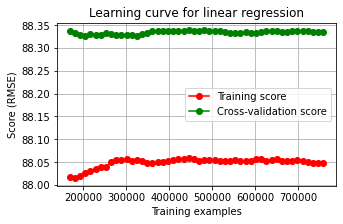

In [18]:
#Learning curve for linear regression (gradient descent)

train_sizes = np.linspace(0.2, 0.9, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Learning curve for linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

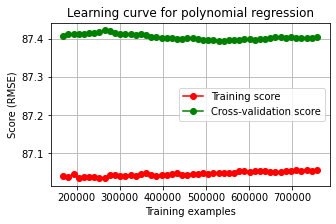

In [19]:
#Learning curve for polynomial regression
train_sizes = np.linspace(0.2, 0.9, 50)

train_sizes, train_mse, test_mse = learning_curve(pol_reg, X_poly, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Learning curve for polynomial regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [20]:
#Learning curve for Random Forest regression

train_sizes = np.linspace(0.2, 0.9, 50)

train_sizes, train_mse, test_mse = learning_curve(rfr, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Learning curve for random forest regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

KeyboardInterrupt: 